# Training Tree Models
### Performed EDA and Feature Engineering on the given dataset. Data is ready for training on the following models.
- Decision Tree
- Random Forest
- Gradient Boosting Classifier
- XGBoost

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
plt.style.use('fivethirtyeight')
sns.set_theme(style="whitegrid")

In [41]:
df = pd.read_csv("train1.csv")

In [42]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI,BMIxGender
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2,3,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,28.259565
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2,3,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,0.000000
2,2,Female,18.000000,1.711460,50.165754,yes,yes,2,1,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,0.000000
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3,3,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,0.000000
4,4,Male,31.641081,1.914186,93.798055,yes,yes,3,2,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,25.599151


In [43]:
test_df = pd.read_csv('test_final.csv')
test_ids = test_df['id']

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  int64  
 1   Gender                          15533 non-null  object 
 2   Age                             15533 non-null  float64
 3   Height                          15533 non-null  float64
 4   Weight                          15533 non-null  float64
 5   family_history_with_overweight  15533 non-null  object 
 6   FAVC                            15533 non-null  object 
 7   FCVC                            15533 non-null  int64  
 8   NCP                             15533 non-null  int64  
 9   CAEC                            15533 non-null  object 
 10  SMOKE                           15533 non-null  object 
 11  CH2O                            15533 non-null  float64
 12  SCC                             

In [45]:
numeric_features = [
    'Age', 'Height', 'Weight', 'BMI',
     'BMIxGender', 'CH2O', 'FAF', 'TUE'
]

categorical_features = [
    'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'FCVC', 'NCP',
     'SCC', 'CALC', 'MTRANS'

]

In [46]:
le = LabelEncoder()
y = le.fit_transform(df['WeightCategory'])

In [47]:
X = df[numeric_features + categorical_features]
X_test_submission = test_df[numeric_features + categorical_features]
X.shape

(15533, 17)

In [48]:
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numeric_features),
                                               ('cat', OneHotEncoder(), categorical_features)], remainder='passthrough')

In [49]:
preprocessor.fit(X)

#Transform BOTH the training data (X) and the submission data (X_test_submission)
X_train_processed_array = preprocessor.transform(X)
X_test_processed_array = preprocessor.transform(X_test_submission)

feature_names = preprocessor.get_feature_names_out()

# Create your new processed DataFrames
X_train_processed = pd.DataFrame(X_train_processed_array, columns=feature_names, index=X.index)
X_test_processed = pd.DataFrame(X_test_processed_array, columns=feature_names, index=X_test_submission.index)

In [50]:
X_train_processed.head()

,num__Age,num__Height,num__Weight,num__BMI,num__BMIxGender,num__CH2O,num__FAF,num__TUE,cat__Gender_Female,cat__Gender_Male,...,cat__SCC_no,cat__SCC_yes,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking
0,0.110667,0.000910,-0.231918,-0.235071,0.874915,1.211010,-1.167485,0.602221,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.027075,-1.596015,-1.167509,-0.816880,-0.956106,-0.045459,0.027524,0.641290,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-1.027075,0.131655,-1.426693,-1.574034,-0.956106,-0.192933,-0.132554,1.759822,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.505665,0.123328,1.649315,1.760978,-0.956106,-0.581796,0.586624,0.276295,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.381740,2.444105,0.228033,-0.555043,0.702539,-0.078619,1.184260,0.527908,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
X_test_processed.head()

,num__Age,num__Height,num__Weight,num__BMI,num__BMIxGender,num__CH2O,num__FAF,num__TUE,cat__Gender_Female,cat__Gender_Male,...,cat__SCC_no,cat__SCC_yes,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking
0,-0.849222,0.827343,1.898772,1.643628,-0.956106,-0.033368,0.584315,0.331153,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.396292,-0.017934,-0.484871,-0.506576,-0.956106,-0.045459,0.718028,2.079095,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.270402,0.428151,-0.219401,-0.366881,0.803906,-0.324186,-0.628525,-1.019279,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.253777,0.863057,1.254353,0.976798,1.527779,0.192100,-0.315771,-0.853143,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.027075,-0.341270,-0.864114,-0.830761,-0.956106,-0.045459,0.027524,0.641290,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [52]:
X_test_processed['BMI_sq'] = X_test_processed['num__BMI'] ** 2

In [53]:
X_train_processed['BMI_sq'] = X_train_processed['num__BMI'] ** 2

In [54]:
# Set up 5-Fold Cross-Validation
k_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [55]:
# Training Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)

base_scores_dt = cross_val_score(model_dt, X_train_processed, y, cv=k_folds, scoring='accuracy', n_jobs=-1)
mean_score_dt_base = np.mean(base_scores_dt)

print(f"Baseline Decision Tree CV Accuracy: {mean_score_dt_base * 100:.3f}%")

Baseline Decision Tree CV Accuracy: 83.777%


In [56]:
# Hyperparameter tuning Decision Tree
param_grid_dt = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=k_folds,
    scoring='accuracy',
    n_jobs=1,
    verbose=1
)

grid_search_dt.fit(X_train_processed, y)

print(f"Best Tuned DT CV Accuracy: {grid_search_dt.best_score_ * 100:.3f}%")
print(f"Best DT Parameters: {grid_search_dt.best_params_}")

model_scores = {'Decision Tree': grid_search_dt.best_score_}

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Tuned DT CV Accuracy: 86.925%
Best DT Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}


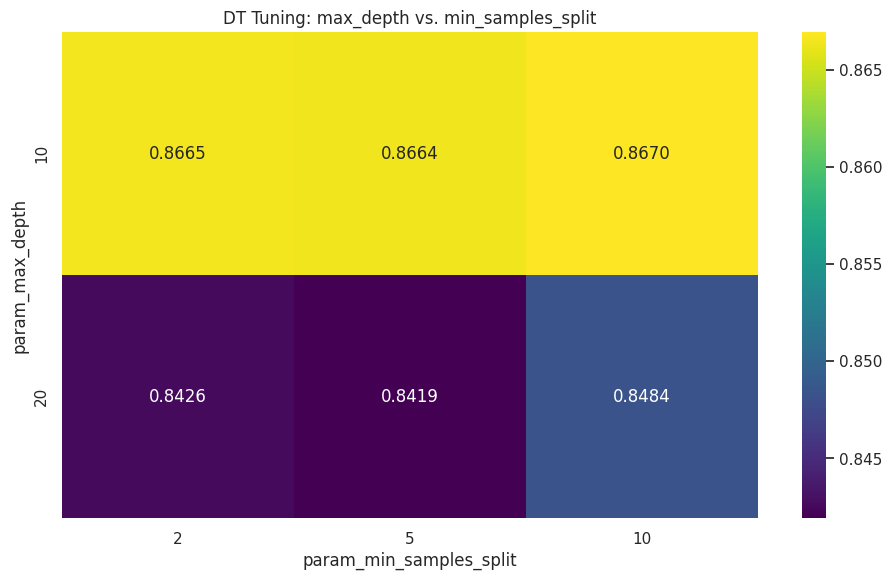

In [57]:
results_df_dt = pd.DataFrame(grid_search_dt.cv_results_)

heatmap_data_dt = pd.pivot_table(
      results_df_dt, values='mean_test_score',
      index='param_max_depth',
      columns='param_min_samples_split'
)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_dt, annot=True, fmt=".4f", cmap="viridis")
plt.title('DT Tuning: max_depth vs. min_samples_split')
plt.show()

In [58]:
# Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

base_scores_rf = cross_val_score(model_rf, X_train_processed, y, cv=k_folds, scoring='accuracy', n_jobs=-1)
mean_score_rf_base = np.mean(base_scores_rf)

print(f"Baseline Random Forest CV Accuracy: {mean_score_rf_base * 100:.3f}%")

Baseline Random Forest CV Accuracy: 89.236%


In [59]:
# Hyper parameter tuning RF
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [20, 30],
    'min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid_rf,
    cv=k_folds,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_processed, y)

print(f"Best Tuned RF CV Accuracy: {grid_search_rf.best_score_ * 100:.3f}%")
print(f"Best RF Parameters: {grid_search_rf.best_params_}")

model_scores['Random Forest'] = grid_search_rf.best_score_



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Tuned RF CV Accuracy: 89.410%
Best RF Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


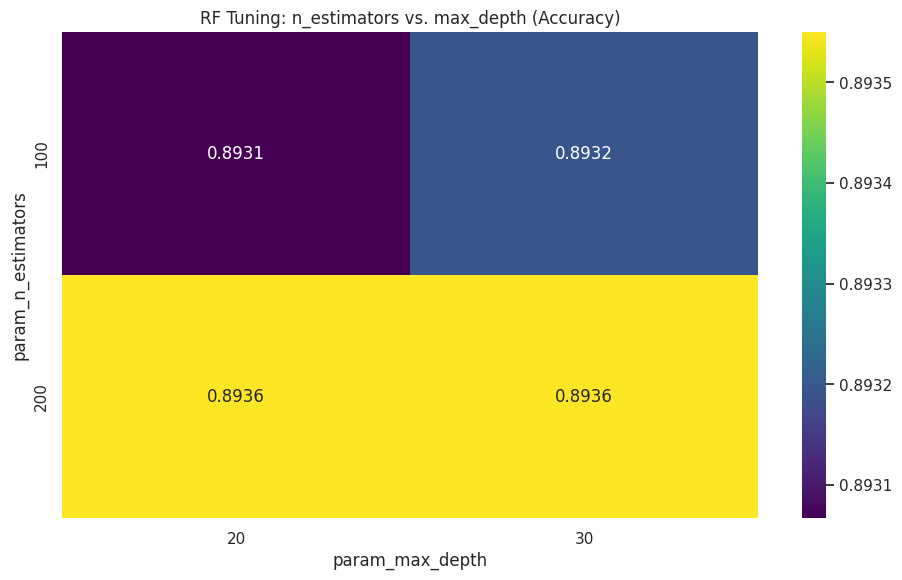

In [60]:
results_df_rf = pd.DataFrame(grid_search_rf.cv_results_)

heatmap_data_rf = pd.pivot_table(
      results_df_rf, values='mean_test_score',
      index='param_n_estimators',
      columns='param_max_depth'
      )
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_rf, annot=True, fmt=".4f", cmap="viridis")
plt.title('RF Tuning: n_estimators vs. max_depth (Accuracy)')
plt.show()

In [61]:
# Gradient Boosting Model
model_gb = GradientBoostingClassifier(random_state=42)

base_scores_gb = cross_val_score(model_gb, X_train_processed, y, cv=k_folds, scoring='accuracy')
mean_score_gb_base = np.mean(base_scores_gb)

print(f"Baseline Gradient Boosting CV Accuracy: {mean_score_gb_base * 100:.3f}%")

Baseline Gradient Boosting CV Accuracy: 89.545%


In [62]:
#Hyper parameter tuning GB
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5]
}

grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb,
    cv=k_folds,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_gb.fit(X_train_processed, y)

print(f"Best Tuned GB CV Accuracy: {grid_search_gb.best_score_ * 100:.3f}%")
print(f"Best GB Parameters: {grid_search_gb.best_params_}")

model_scores['Gradient Boosting'] = grid_search_gb.best_score_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Tuned GB CV Accuracy: 89.925%
Best GB Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


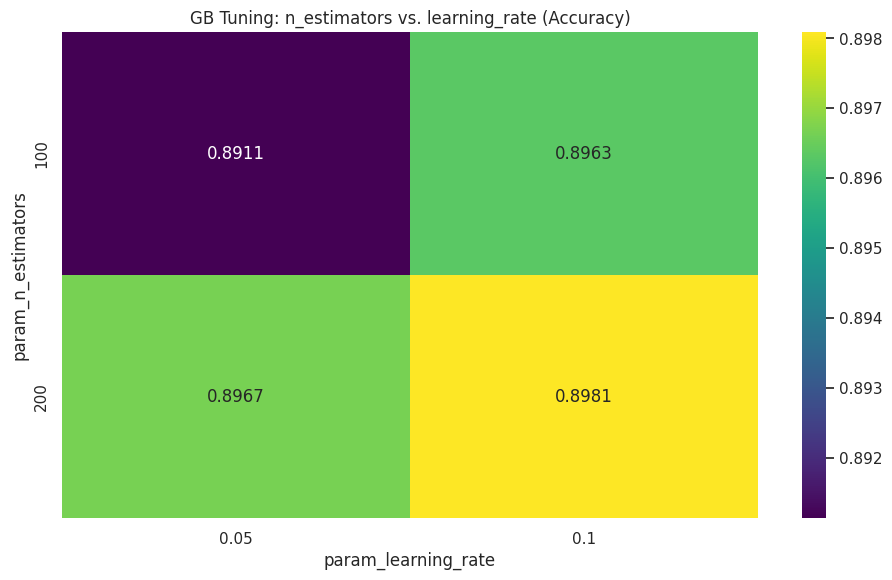

In [63]:
results_df_gb = pd.DataFrame(grid_search_gb.cv_results_)
heatmap_data_gb = pd.pivot_table(
      results_df_gb, values='mean_test_score',
      index='param_n_estimators',
      columns='param_learning_rate'
)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_gb, annot=True, fmt=".4f", cmap="viridis")
plt.title('GB Tuning: n_estimators vs. learning_rate (Accuracy)')
plt.show()

In [64]:
# XBG
model_xgb_base = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    random_state=42,
    #device='cuda',
    tree_method='hist',
    n_jobs=1
)

# CV score
base_scores_xgb = cross_val_score(model_xgb_base, X_train_processed, y, cv=k_folds, scoring='accuracy', n_jobs=1)
mean_score_xgb_base = np.mean(base_scores_xgb)

print(f"Baseline XGBoost CV Accuracy: {mean_score_xgb_base * 100:.3f}%")


Baseline XGBoost CV Accuracy: 89.783%


In [68]:
dt_acc = 83.777
rf_acc = 89.236
gb_acc = 89.545
xgb_acc = 89.783

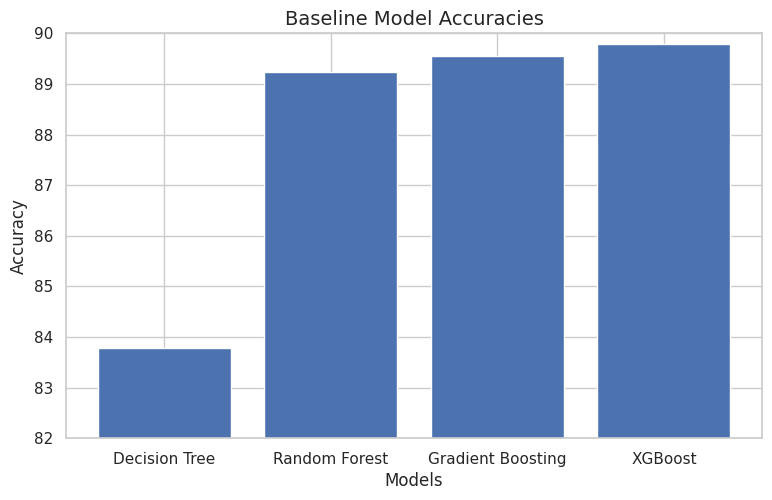

In [69]:
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
accuracies = [dt_acc, rf_acc, gb_acc, xgb_acc]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies)
plt.title('Baseline Model Accuracies', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.ylim(82, 90)
plt.show()

- Trained our dataset on various tree based models.
- Performed hyper parameter tuning on each of them.
- Done comparative study on the performance of each base model.
- Based on performance selected XGBoost as our model for further  training and analysis